In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#set plot style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [ ]:
#Load the processed dataset
data_path="../data/processed/stroke_data_processed.csv"
df = pd.read_csv(data_path)
df.head(5)
df.isnull().sum()

In [ ]:
# Column info
df.info()

# Missing values
df.isnull().sum()

# Summary statistics
df.describe(include="all")


C:\Users\moham\AppData\Local\Temp\ipykernel_20936\2993756415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stroke", data=df, palette="coolwarm")


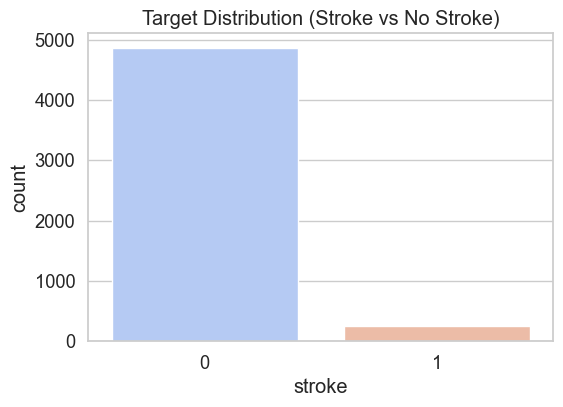

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="stroke", data=df, palette="coolwarm")
plt.title("Target Distribution (Stroke vs No Stroke)")
plt.show()

print(df["stroke"].value_counts(normalize=True))


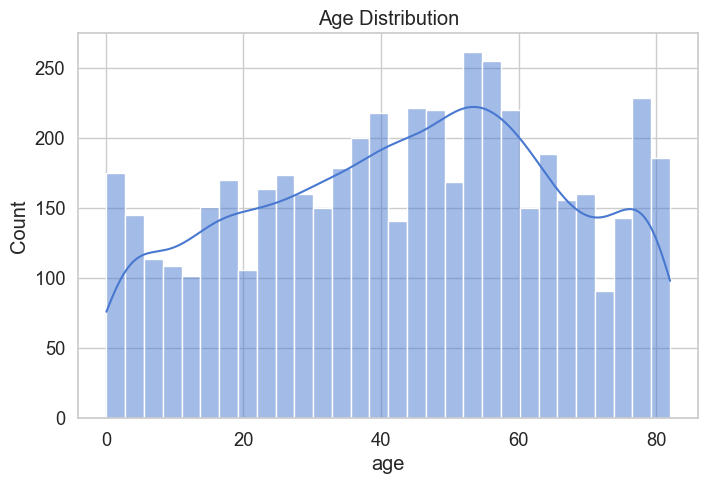

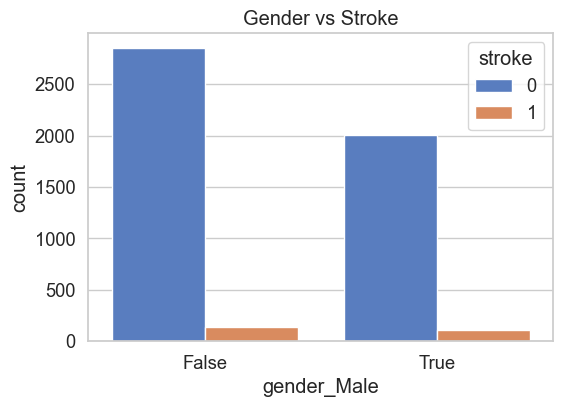

In [11]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Gender vs Stroke
plt.figure(figsize=(6,4))
sns.countplot(x="gender_Male", hue="stroke", data=df, palette="muted")
plt.title("Gender vs Stroke")
plt.show()


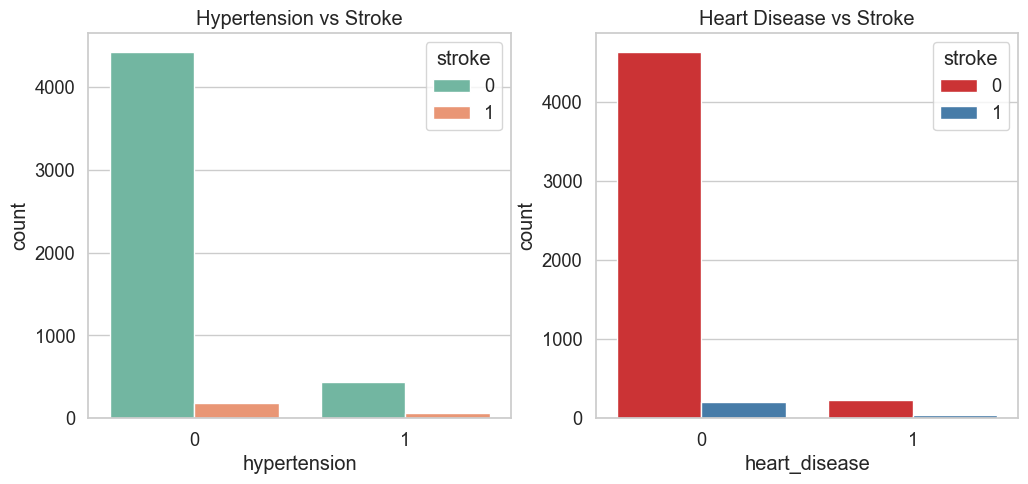

In [12]:
# Hypertension and Heart Disease vs Stroke
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x="hypertension", hue="stroke", data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Hypertension vs Stroke")

sns.countplot(x="heart_disease", hue="stroke", data=df, ax=axes[1], palette="Set1")
axes[1].set_title("Heart Disease vs Stroke")

plt.show()


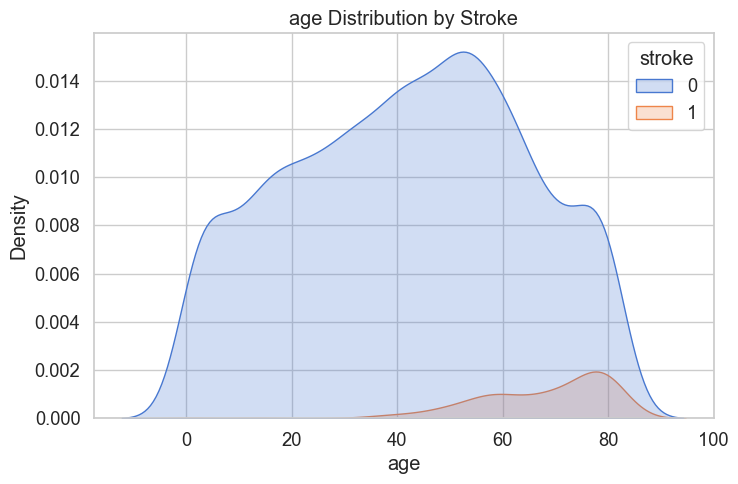

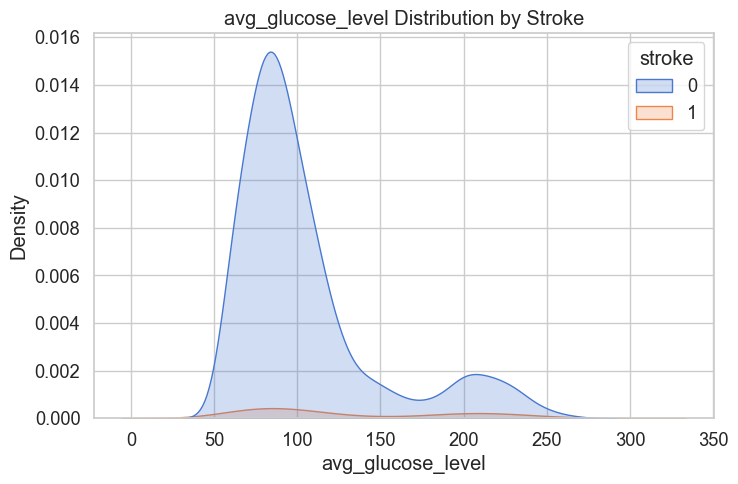

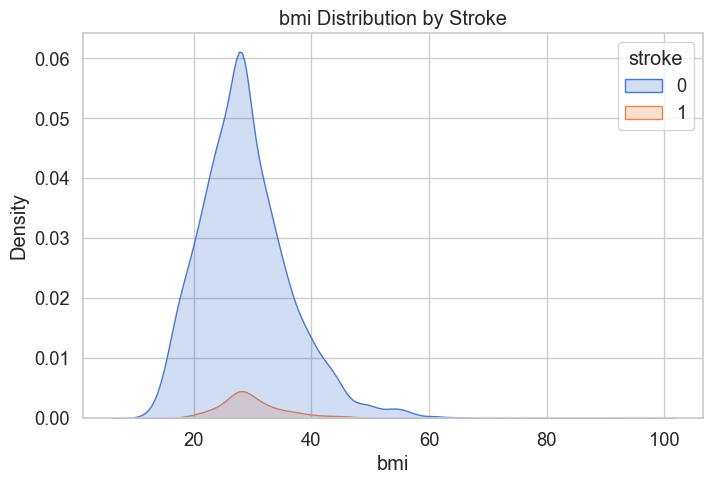

In [13]:
num_cols = ["age", "avg_glucose_level", "bmi"]

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=df, x=col, hue="stroke", fill=True)
    plt.title(f"{col} Distribution by Stroke")
    plt.show()


In [19]:
# Calculate stroke rate per category
categorical_cols = [col for col in df.columns if "cat__" in col]

stroke_rate = {}
for col in categorical_cols:
    stroke_rate[col] = df.groupby(col)["stroke"].mean().to_dict()

print("Stroke rates by category features:")
for k,v in stroke_rate.items():
    print(k, ":", v)
print("hello")


Stroke rates by category features:
hello
